# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://hdjq.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1/job/25017214">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://web.archive.org/web/20230115132446/https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to the following:
    - tomer.zemelman@emerson.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [59]:
import pandas as pd
import zipfile
from datetime import datetime

### Load Data

In [60]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [63]:
#load train data
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,8PFrAN,0,27,True,False
1,8PFrAN,0,28,True,False
2,8PFrAN,0,29,True,False
3,8PFrAN,0,30,True,False
4,8PFrAN,0,31,True,False


In [64]:
#load test data
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,mZa9ls,0,23,True
1,mZa9ls,0,24,True
2,mZa9ls,0,25,True
3,mZa9ls,0,26,True
4,mZa9ls,0,27,True


You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [70]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

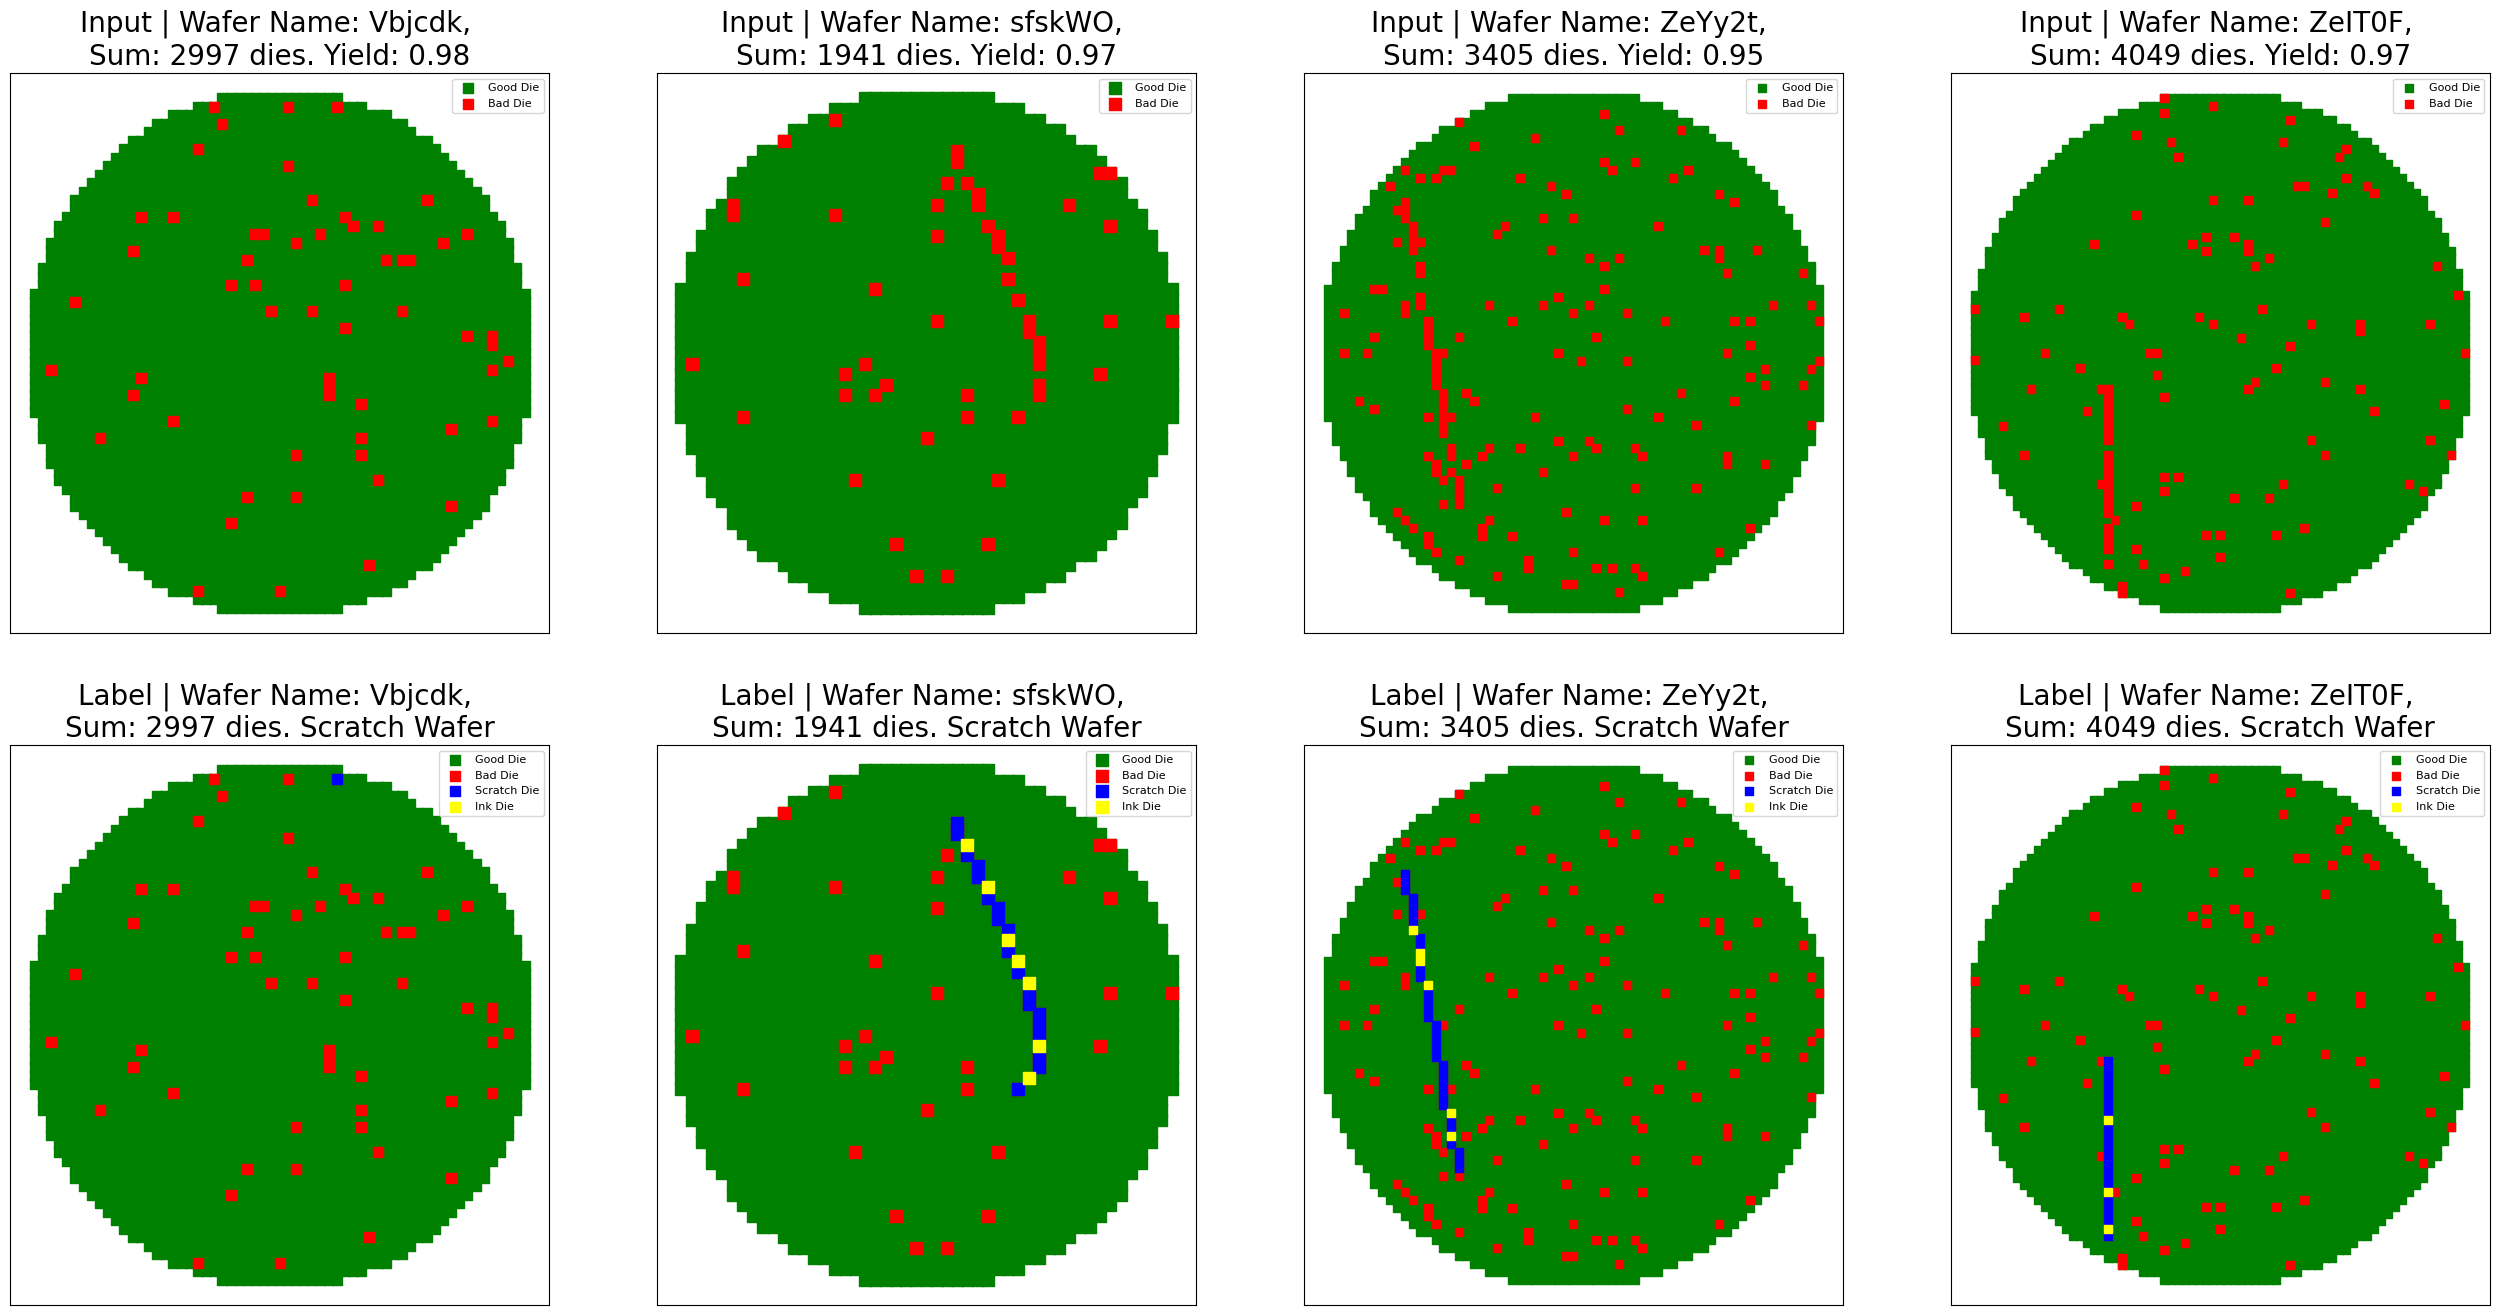

In [74]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

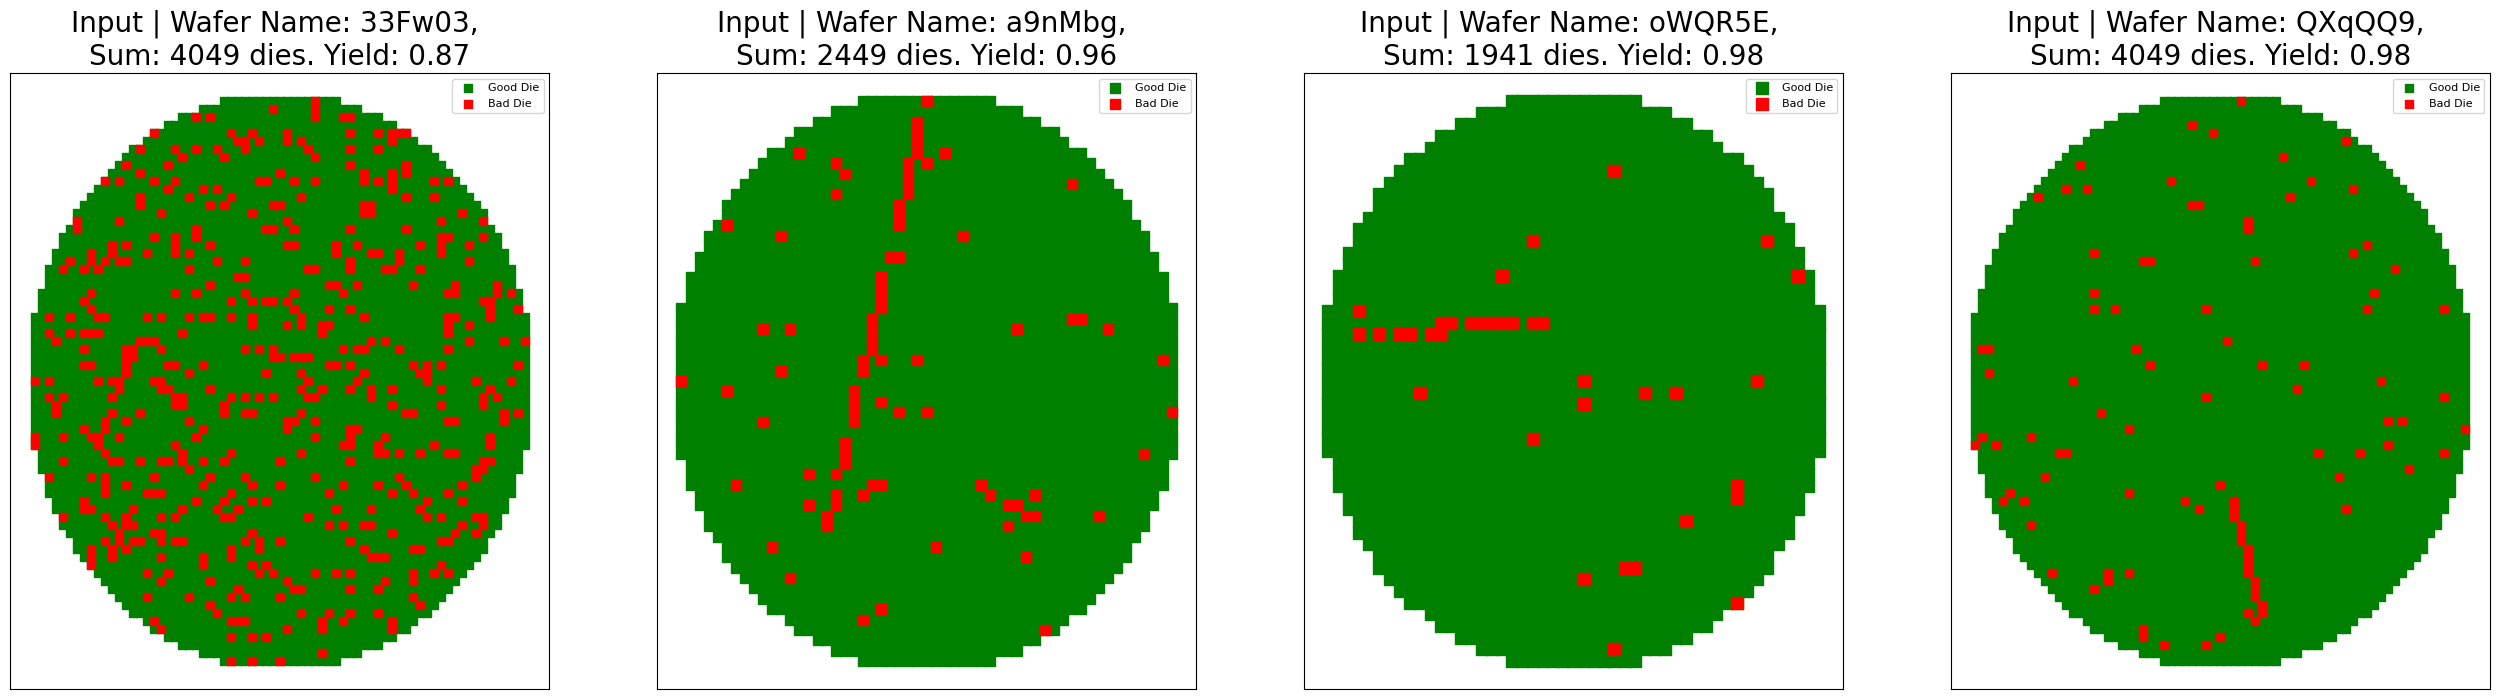

In [72]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

1. Data Exploration

In [38]:
df_wafers.info()
print()
num_dups = df_wafers.duplicated().sum()
print(f"Number of duplicate rows: {num_dups}\n")

num_wafers = df_wafers['WaferName'].nunique()
print(f"Number of wafers: {num_wafers}")

total_dies = len(df_wafers)
print(f"Total dies: {total_dies}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10415400 entries, 0 to 10415399
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   WaferName     object
 1   DieX          int64 
 2   DieY          int64 
 3   IsGoodDie     bool  
 4   IsScratchDie  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 258.3+ MB

Number of duplicate rows: 0

Number of wafers: 4200
Total dies: 10415400


2.

In [ ]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm


## FINDING BAD WAFERS

def filter_out_bad_wafers(df, bad_yield_threshold=0.05):
    """
    Removes wafers whose bad-die yield exceeds the given threshold.

    :param df:       pandas.DataFrame with columns ['WaferName','IsGoodDie',…]
    :param bad_yield_threshold: float, maximum allowed fraction of bad dies
    :return: (filtered_df, bad_wafers)
      - filtered_df: same as df but with all rows from “bad” wafers removed
      - bad_wafers:  list of wafer names that were filtered out
    """
    # 1. Compute per‐wafer good‐die yield
    yield_df = (
        df
        .groupby('WaferName')['IsGoodDie']
        .mean()
        .reset_index()
        .rename(columns={'IsGoodDie': 'good_yield'})
    )
    # 2. Compute bad‐die yield
    yield_df['bad_yield'] = 1 - yield_df['good_yield']

    # 3. Identify wafers to drop
    bad_wafers = yield_df.loc[yield_df['bad_yield'] > bad_yield_threshold, 'WaferName'].tolist()


    # 4. Filter them out
    filtered_df = df.loc[~df['WaferName'].isin(bad_wafers)].copy()

    return filtered_df, bad_wafers


# 1. Filter out the high–bad–yield wafers
df_wafers_filtered, bad_wafers = filter_out_bad_wafers(df_wafers, bad_yield_threshold=0.05)


# Determine image dimensions from the data
# original grid size
W0 = df_wafers_filtered['DieX'].max() + 1
H0 = df_wafers_filtered['DieY'].max() + 1

# pad to next even integer if needed
W = W0 if (W0 % 2 == 0) else W0 + 1
H = H0 if (H0 % 2 == 0) else H0 + 1

print(f"Raster images will be {H}×{W} (even dimensions)")

# Provided wafer_to_tensor function (using global H, W)
def wafer_to_tensor(df_wafer):
    """
    Convert all rows of a single wafer (df_wafer) into a 2-channel image tensor.
    Channel 0: bad-die mask, Channel 1: good-die mask.
    """
    img = np.zeros((2, H, W), dtype=np.float32)
    # Bad dies (IsGoodDie False) -> channel 0
    bad = df_wafer.loc[~df_wafer.IsGoodDie]
    img[0, bad.DieY, bad.DieX] = 1.0
    # Good dies (IsGoodDie True) -> channel 1
    good = df_wafer.loc[df_wafer.IsGoodDie]
    img[1, good.DieY, good.DieX] = 1.0
    return img  # shape (2, H, W)

# Create the target mask for a wafer
def scratch_mask(df_wafer):
    """
    Create a binary mask of shape (H, W) with 1 at positions of scratch dies.
    """
    mask = np.zeros((H, W), dtype=np.float32)
    scratched = df_wafer.loc[df_wafer.IsScratchDie]  # dies that are part of a scratch
    mask[scratched.DieY, scratched.DieX] = 1.0
    return mask

# Custom Dataset to yield (image_tensor, label_mask) pairs
class WaferDataset(Dataset):
    def __init__(self, df, wafer_names):
        self.df = df
        self.wafer_names = wafer_names  # list of wafer identifiers to include

    def __len__(self):
        return len(self.wafer_names)

    def __getitem__(self, idx):
        wafer_name = self.wafer_names[idx]
        df_wafer = self.df[self.df.WaferName == wafer_name]
        # Convert wafer to image and mask
        img = wafer_to_tensor(df_wafer)            # numpy array (2, H, W)
        mask = scratch_mask(df_wafer)              # numpy array (H, W)
        # Convert to torch tensors
        img_tensor = torch.from_numpy(img)         # shape (2, H, W)
        mask_tensor = torch.from_numpy(mask)       # shape (H, W)
        return img_tensor, mask_tensor


##################### SPLITTING TO TRAIN TEST VALIDATION
import random

# Get unique wafer identifiers
all_wafers = df_wafers_filtered['WaferName'].unique()
all_wafers = list(all_wafers)
random.seed(42)
random.shuffle(all_wafers)

# Compute split indices
num_wafers = len(all_wafers)
train_count = int(0.7 * num_wafers)
val_count = int(0.2 * num_wafers)
test_count = num_wafers - train_count - val_count  # remaining 10%

train_wafers = all_wafers[:train_count]
val_wafers   = all_wafers[train_count:train_count+val_count]
test_wafers  = all_wafers[train_count+val_count:]
print(f"Total wafers: {num_wafers}")
print(f"Train: {len(train_wafers)}, Val: {len(val_wafers)}, Test: {len(test_wafers)}")


########################## Create Dataset instances
train_dataset = WaferDataset(df_wafers_filtered, train_wafers)
val_dataset   = WaferDataset(df_wafers_filtered, val_wafers)
test_dataset  = WaferDataset(df_wafers_filtered, test_wafers)

# Create DataLoaders (we will set batch_size via hyperparameter grid later; use placeholder here)
batch_size = 16  # (we will override this in grid search)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


############ CNN IMPLEMENTATION
import torch.nn as nn
import torch.nn.functional as F

class ScratchCNN(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(ScratchCNN, self).__init__()
        # Encoder
        self.enc_conv1 = nn.Conv2d(2, 16, kernel_size=3, padding=1)   # input 2 channels -> 16 features
        self.enc_conv2 = nn.Conv2d(16, 16, kernel_size=3, padding=1)  # refine features
        self.pool = nn.MaxPool2d(2)  # reduce spatial size by 2

        self.enc_conv3 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # deeper conv 16 -> 32
        self.enc_conv4 = nn.Conv2d(32, 32, kernel_size=3, padding=1)  # refine deeper features

        # Decoder
        self.upconv = nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2)  # upsample back to size, 32->16 channels
        # (Alternatively, F.interpolate can be used for upsampling followed by a conv)

        self.dec_conv1 = nn.Conv2d(16+16, 16, kernel_size=3, padding=1)    # concatenate skip (16 from encoder + 16 from upsampled)
        self.dec_conv2 = nn.Conv2d(16, 16, kernel_size=3, padding=1)

        # Output layer
        self.out_conv = nn.Conv2d(16, 1, kernel_size=1)  # 1 channel output (logit for scratch)

        # Dropout layer
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        # Encoder forward
        x1 = F.relu(self.enc_conv1(x))
        x1 = F.relu(self.enc_conv2(x1))
        x1_pool = self.pool(x1)                         # downsampled features

        x2 = F.relu(self.enc_conv3(x1_pool))
        x2 = F.relu(self.enc_conv4(x2))
        # (At this point x2 is half resolution of input)

        # Decoder forward
        x2_up = self.upconv(x2)      # upsample exactly 2×
        # now x2_up.shape[-2:] == x1.shape[-2:] because H,W are even
        x_cat = torch.cat([x1, x2_up], dim=1)

        x_cat = self.dropout(x_cat)                    # apply dropout on the combined features
        x3 = F.relu(self.dec_conv1(x_cat))
        x3 = F.relu(self.dec_conv2(x3))

        out = self.out_conv(x3)  # shape: (1, H, W), raw logits
        return out


################### TRAINING
from sklearn.metrics import f1_score

def compute_f1(pred_mask, true_mask):
    """
    Compute F1 score for the scratch class given predicted mask and true mask.
    pred_mask, true_mask are torch tensors of shape (H, W) with binary values {0,1}.
    """
    pred_mask_flat = pred_mask.flatten().cpu().numpy()
    true_mask_flat = true_mask.flatten().cpu().numpy()
    # Compute F1 for positive class (scratch); average='binary' considers only class 1
    return f1_score(true_mask_flat, pred_mask_flat, average='binary', zero_division=0)

# Training loop for one model
def train_model(model, train_loader, val_loader, optimizer, num_epochs=50, patience=5):
    criterion = nn.BCEWithLogitsLoss()
    best_f1 = 0.0
    best_model_state = None
    patience_counter = 0

    # To track metrics per epoch
    history = {'train_loss': [], 'val_loss': [], 'val_f1': []}

    for epoch in range(1, num_epochs+1):
        model.train()
        running_loss = 0.0

        # Training loop with progress bar
        for images, masks in tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}", leave=False):
            images = images.to(device)  # move to GPU if available
            masks = masks.to(device)

            optimizer.zero_grad()
            logits = model(images)              # forward pass (logits shape: [batch,1,H,W])
            loss = criterion(logits, masks.unsqueeze(1))  # add channel dim to masks: [batch,1,H,W]
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)  # accumulate sum of loss for averaging

        # Compute average training loss for the epoch
        epoch_train_loss = running_loss / len(train_loader.dataset)
        history['train_loss'].append(epoch_train_loss)

        # Validation step (no gradient)
        model.eval()
        val_loss = 0.0
        all_preds = []
        all_true = []
        with torch.no_grad():
            for images, masks in val_loader:
                images = images.to(device)
                masks = masks.to(device)
                logits = model(images)
                # Compute loss on validation batch
                loss = criterion(logits, masks.unsqueeze(1))
                val_loss += loss.item() * images.size(0)
                # Apply sigmoid to get probabilities, then threshold to binary predictions
                prob = torch.sigmoid(logits)
                pred = (prob >= 0.5).long()      # predicted mask (0 or 1)
                # Collect for F1 (flatten batch dimension and spatial dimensions)
                all_preds.append(pred.cpu().numpy())
                all_true.append(masks.cpu().numpy())
        # Compute average validation loss
        epoch_val_loss = val_loss / len(val_loader.dataset)
        history['val_loss'].append(epoch_val_loss)
        # Stack all predictions and truths for F1
        all_preds = np.concatenate(all_preds).flatten()
        all_true = np.concatenate(all_true).flatten()
        val_f1 = f1_score(all_true, all_preds, average='binary', zero_division=0)
        history['val_f1'].append(val_f1)

        # Print epoch summary
        print(f"Epoch {epoch}: train_loss={epoch_train_loss:.4f}, val_loss={epoch_val_loss:.4f}, val_F1={val_f1:.4f}")

        # Early stopping check
        if val_f1 > best_f1:
            best_f1 = val_f1
            best_model_state = model.state_dict()  # save best model parameters
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered after {epoch} epochs.")
                break

    # After training, load the best model state (best val F1) before returning
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    return model, best_f1, history


################ GRID SEARCH
import itertools

# Define hyperparameter search space
learning_rates = [1e-3]
dropout_rates = [0.1]
batch_sizes = [8]

best_val_f1 = 0.0
best_params = None
best_model = None

# Device configuration (use GPU if available for faster training)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for lr, dr, bs in itertools.product(learning_rates, dropout_rates, batch_sizes):
    print(f"\nTraining model with lr={lr}, dropout={dr}, batch_size={bs}")
    # Update DataLoader batch size for this trial
    train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
    val_loader   = DataLoader(val_dataset, batch_size=bs, shuffle=False)
    # Initialize model and move to device
    model = ScratchCNN(dropout_rate=dr).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # Train the model with early stopping
    model_trained, val_f1, history = train_model(model, train_loader, val_loader, optimizer,
                                                num_epochs=50, patience=5)
    print(f"Finished training: val_F1={val_f1:.4f}")
    # Check if this is the best model so far
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        best_params = {'learning_rate': lr, 'dropout': dr, 'batch_size': bs}
        best_model = model_trained
        # Save the best model weights to disk
        torch.save(best_model.state_dict(), "best_model.pth")
        print("New best model saved with F1 {:.4f}".format(best_val_f1))

print("\nBest validation F1: {:.4f} with parameters: {}".format(best_val_f1, best_params))


###### runnning best model on test set
model = ScratchCNN(dropout_rate=best_params['dropout'])
model.load_state_dict(torch.load("best_model.pth", map_location=device))
model.to(device)
model.eval()

# Evaluate on the internal test set
all_preds = []
all_true = []
with torch.no_grad():
    for images, masks in test_loader:
        images = images.to(device)
        masks = masks.to(device)
        logits = model(images)
        probs = torch.sigmoid(logits)
        preds = (probs >= 0.5).long()  # binary predictions
        all_preds.append(preds.cpu().numpy())
        all_true.append(masks.cpu().numpy())
# Flatten and compute F1 on test set
all_preds = np.concatenate(all_preds).flatten()
all_true = np.concatenate(all_true).flatten()
test_f1 = f1_score(all_true, all_preds, average='binary', zero_division=0)
print(f"Test F1-score: {test_f1:.4f}")


Raster images will be 72×72 (even dimensions)
Total wafers: 3686
Train: 2580, Val: 737, Test: 369

Training model with lr=0.001, dropout=0.1, batch_size=8


Epoch 1/50:  33%|███▎      | 108/323 [06:33<12:43,  3.55s/it]






































import matplotlib.pyplot as plt
def show_first_wafer_image(df_wafers):
    # 1. Pick the first wafer name
    first_wafer = df_wafers['WaferName'].unique()[0]

    # 2. Filter its DataFrame
    df_first = df_wafers[df_wafers['WaferName'] == first_wafer]

    # 3. Rasterize it
    img = wafer_to_tensor(df_first)   # returns a (2, H, W) array

    # 4. Plot the two channels
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img[0], cmap='gray')
    axes[0].set_title(f'{first_wafer} — Bad‐die Mask')
    axes[1].imshow(img[1], cmap='gray')
    axes[1].set_title(f'{first_wafer} — Good‐die Mask')
    for ax in axes:
        ax.axis('off')
    plt.show()



# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [ ]:
#TODO add your thoughts

When starting to work on the problem, after some exploration, I started thinking of the architecture of the solution.
Firstly it makes sense to filter the data initially, we could calculate the yield of the wafer and if it is too low we will determine it as bad. Later down the pipeline I thought of implementing a CNN, seeing it was used in research of the topic (Hidden Wafer Scratch Defects Projection for Diagnosis and Quality Enhancement, https://ieeexplore.ieee.org/abstract/document/9273073)




# Submission

In [ ]:
#TODO

#model = (...)
IsScratchDie = model.predict(df_wafers_test)
df_wafers_test['IsScratchDie'] = IsScratchDie

#TODO Fill in your name and email
name = 'FirstName LastName'
email = 'my_email@gmail.com'

#Dont change the following code
date_str = datetime.now().strftime('%Y%m%d')
filename = f"{date_str}_{name}_{email}_df_wafers_test_with_preds.csv"
df_wafers_test.to_csv(filename, index=False)
print("Saved file:", filename)